In [6]:
import pandas as pd

In [7]:
data =pd.read_csv("/Users/divayanshisharama/Desktop/mall/Mall_Customers.csv")

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [11]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [12]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [13]:
data['Gender']=data['Gender'].map({'Male':0, 'Female': 1})

EDA (Explortory Data Analysis)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

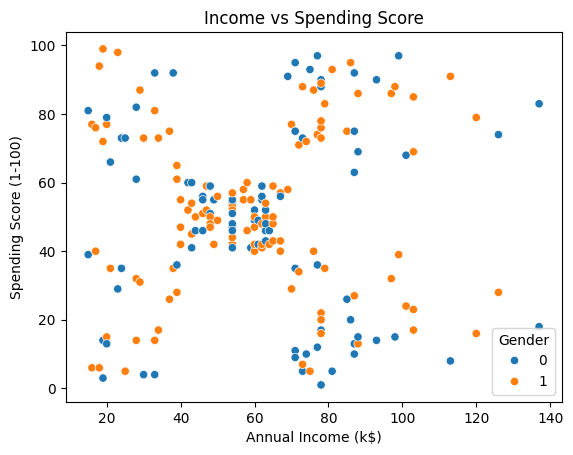

In [16]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Income vs Spending Score')
plt.show()

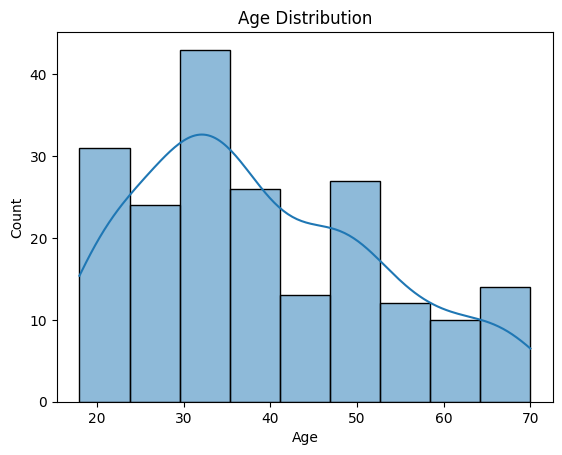

In [18]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

Applying the Clustering

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [25]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
scaler = StandardScaler()
scaled_features= scaler.fit_transform(features)

In [27]:
#finding the optimal solution using elbow methods

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


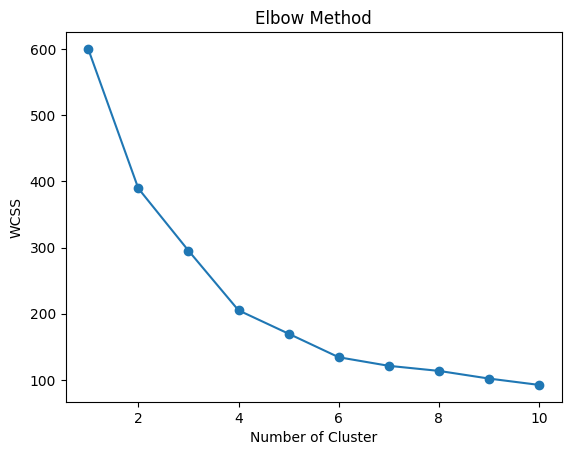

In [28]:
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [32]:
optimal_clusters=5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster']=kmeans.fit_predict(scaled_features)

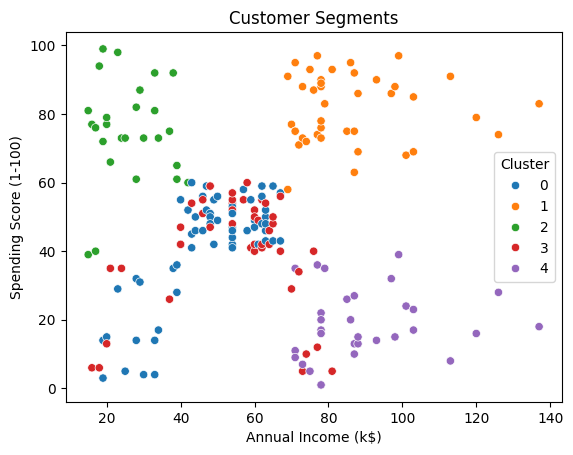

In [34]:

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='tab10')
plt.title('Customer Segments')
plt.show()
